In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

%matplotlib inline

In [2]:

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [3]:
# Convert our data into pytorch tensor

x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


In [4]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
model = linearRegression()

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)


In [7]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

Epoch[20/1000], loss: 5.447823
Epoch[40/1000], loss: 3.964789
Epoch[60/1000], loss: 2.916595
Epoch[80/1000], loss: 2.175724
Epoch[100/1000], loss: 1.652050
Epoch[120/1000], loss: 1.281880
Epoch[140/1000], loss: 1.020198
Epoch[160/1000], loss: 0.835189
Epoch[180/1000], loss: 0.704368
Epoch[200/1000], loss: 0.611844
Epoch[220/1000], loss: 0.546388
Epoch[240/1000], loss: 0.500061
Epoch[260/1000], loss: 0.467254
Epoch[280/1000], loss: 0.444001
Epoch[300/1000], loss: 0.427502
Epoch[320/1000], loss: 0.415775
Epoch[340/1000], loss: 0.407421
Epoch[360/1000], loss: 0.401451
Epoch[380/1000], loss: 0.397166
Epoch[400/1000], loss: 0.394073
Epoch[420/1000], loss: 0.391821
Epoch[440/1000], loss: 0.390164
Epoch[460/1000], loss: 0.388927
Epoch[480/1000], loss: 0.387988
Epoch[500/1000], loss: 0.387259
Epoch[520/1000], loss: 0.386678
Epoch[540/1000], loss: 0.386203
Epoch[560/1000], loss: 0.385802
Epoch[580/1000], loss: 0.385453
Epoch[600/1000], loss: 0.385142
Epoch[620/1000], loss: 0.384857
Epoch[640/10

In [12]:
model.eval()
with torch.no_grad():
    predict = model(x_train)


In [13]:
predict = predict.data.numpy()

In [14]:
predict

array([[0.937375  ],
       [1.4241657 ],
       [1.9109561 ],
       [2.446426  ],
       [2.543784  ],
       [1.3214972 ],
       [3.8045716 ],
       [2.2127664 ],
       [2.8358583 ],
       [0.43598068],
       [2.593348  ],
       [4.252419  ],
       [1.8282018 ],
       [3.015971  ],
       [0.8488676 ]], dtype=float32)

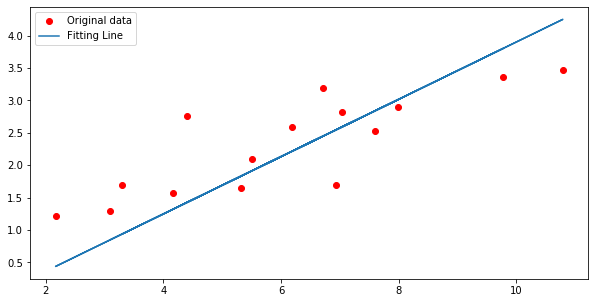

In [15]:

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

# Save your model
torch.save(model.state_dict(), './linear.pth')
